# Exercise 4.10 Pt 1.1 - Gerardo Pérez

In [1]:
# 1. Importing libraries and dataframes:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Instacart Basket Analysis'

In [5]:
final_OPC = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'comb_cust_ords_prods.pkl'))

In [7]:
final_OPC.shape

(32404859, 27)

In [12]:
final_OPC.describe

<bound method NDFrame.describe of            order_id user_id  order_number  orders_day_of_week  order_by_hour  \
0               2.0  202279             3                   5              9   
1               2.0  202279             3                   5              9   
2               2.0  202279             3                   5              9   
3               2.0  202279             3                   5              9   
4               2.0  202279             3                   5              9   
...             ...     ...           ...                 ...            ...   
32404854  3421083.0   25247            24                   2              6   
32404855  3421083.0   25247            24                   2              6   
32404856  3421083.0   25247            24                   2              6   
32404857  3421083.0   25247            24                   2              6   
32404858  3421083.0   25247            24                   2              6   

     

# 2. PII considerations

In [ ]:
# The dataframe contains PII sensitive information, such as 'first_name' and 'surname'
# These columns will be dropped and ignored, as the column 'user_id' serves as a unique identifier already for the customers

In [9]:
final_OPC = final_OPC.drop(['first_name', 'surname', '_merge'], axis=1)

In [11]:
final_OPC.head()

,order_id,user_id,order_number,orders_day_of_week,order_by_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,match,busiest_days,busiest_period_of_day,gender,state,age,date_joined,n_dependants,marital_status,income
0,2.0,202279,3,5,9,8.0,33120.0,1,1,33122.0,...,both,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119
1,2.0,202279,3,5,9,8.0,28985.0,2,1,28987.0,...,both,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119
2,2.0,202279,3,5,9,8.0,9327.0,3,0,9327.0,...,both,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119
3,2.0,202279,3,5,9,8.0,45918.0,4,1,45922.0,...,both,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119
4,2.0,202279,3,5,9,8.0,30035.0,5,0,30037.0,...,both,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119


# 3. Creating a regional segmentation of the data

In [13]:
# creating an empty list for the new regions:
region = []

# creating the conditions:
for state in final_OPC["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        region.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        region.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        region.append("West")
    else:
        region.append("Unknown")

In [15]:
# Adding the 'region' list as a column:
final_OPC['region'] = region

In [17]:
final_OPC.head()

,order_id,user_id,order_number,orders_day_of_week,order_by_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,busiest_days,busiest_period_of_day,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,2.0,202279,3,5,9,8.0,33120.0,1,1,33122.0,...,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119,West
1,2.0,202279,3,5,9,8.0,28985.0,2,1,28987.0,...,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119,West
2,2.0,202279,3,5,9,8.0,9327.0,3,0,9327.0,...,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119,West
3,2.0,202279,3,5,9,8.0,45918.0,4,1,45922.0,...,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119,West
4,2.0,202279,3,5,9,8.0,30035.0,5,0,30037.0,...,normally busy days,most orders,Male,Idaho,57,2/6/2020,3,married,98119,West


# 3.2 Checking for differences in spending habits between the different U.S. regions

In [19]:
# Step 1: Create spending_flag based on median income per user_id
median_income = final_OPC.groupby('user_id')['income'].median()  # Calculate median income per user
high_income_users = median_income[median_income > median_income.median()].index  # Users above median income
low_income_users = median_income[median_income <= median_income.median()].index  # Users at or below median income

In [21]:
# Add spending_flag to the final_OPC dataframe
final_OPC['spending_flag'] = final_OPC['user_id'].apply(lambda x: 'high income' if x in high_income_users else 'low income')

In [23]:
# Step 2: Distinct on user_id level
df_distinct_user = final_OPC.drop_duplicates(subset='user_id')

In [25]:
# Crosstab for user_id level (Region vs Spending Flag)
crosstab_user = pd.crosstab(df_distinct_user['region'], df_distinct_user['spending_flag'], dropna=False)

In [27]:
# Step 3: Distinct on order_id level
df_distinct_order = final_OPC.drop_duplicates(subset='order_id')

In [29]:
# Crosstab for order_id level (Region vs Spending Flag)
crosstab_order = pd.crosstab(df_distinct_order['region'], df_distinct_order['spending_flag'], dropna=False)

In [31]:
# Display the crosstabs
print("Crosstab for distinct user_id level:")
print(crosstab_user)

print("\nCrosstab for distinct order_id level:")
print(crosstab_order)

Crosstab for distinct user_id level:
spending_flag  high income  low income
region                                
Midwest              24389       24130
Northeast            18396       17992
South                34181       34556
West                 26137       26428

Crosstab for distinct order_id level:
spending_flag  high income  low income
region                                
Midwest             393558      360717
Northeast           293878      273284
South               547730      523832
West                422416      399270


In [ ]:
# There does not seem to be a significant difference between both of the income groups
# I wanted to check again using the quartiles in order to avoid getting faulty data due to outliers, as it is the case above

In [33]:
# Ensure income is numeric
final_OPC['income'] = pd.to_numeric(final_OPC['income'], errors='coerce')

In [35]:
# Calculate the income quantiles
q1 = final_OPC['income'].quantile(0.25)  # Bottom 25%
q3 = final_OPC['income'].quantile(0.75)  # Top 25%

In [37]:
# Create a new column 'spending_flag' based on quantiles
final_OPC['spending_flag'] = 'middle income'  # Default to middle income
final_OPC.loc[final_OPC['income'] > q3, 'spending_flag'] = 'high income'
final_OPC.loc[final_OPC['income'] <= q1, 'spending_flag'] = 'low income'

In [39]:
# Distinct on user_id level
df_distinct_user = final_OPC.drop_duplicates(subset='user_id')

In [41]:
# Crosstab for user_id level (Region vs Spending Flag)
crosstab_user = pd.crosstab(df_distinct_user['region'], df_distinct_user['spending_flag'], dropna=False)

In [43]:
# Distinct on order_id level
df_distinct_order = final_OPC.drop_duplicates(subset='order_id')

In [45]:
# Crosstab for order_id level (Region vs Spending Flag)
crosstab_order = pd.crosstab(df_distinct_order['region'], df_distinct_order['spending_flag'], dropna=False)

In [47]:
# Display the crosstabs
print("Crosstab for distinct user_id level:")
print(crosstab_user)

print("\nCrosstab for distinct order_id level:")
print(crosstab_order)

Crosstab for distinct user_id level:
spending_flag  high income  low income  middle income
region                                               
Midwest              11284       14789          22446
Northeast             8525       11029          16834
South                15663       21084          31990
West                 12070       16264          24231

Crosstab for distinct order_id level:
spending_flag  high income  low income  middle income
region                                               
Midwest             184021      210166         360088
Northeast           135502      160814         270846
South               253320      304877         513365
West                195114      233266         393306


In [ ]:
# These results show more clear differences between the diffirent incomes
# Most high/middle income customers seem to reside in the South
# While most low income customers are residing in the Northeast region

# 4. Creating an exclusion flag for low-activity customers

In [49]:
# Creating a new column 'max_order'
final_OPC['max_order'] = final_OPC.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\3304991543.py:2: FutureWarning: The provided callable <function max at 0x0000023E06C984A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  final_OPC['max_order'] = final_OPC.groupby(['user_id'])['order_number'].transform(np.max)


In [51]:
# creating an exclusion flag for low activity (less than 5 orders)

final_OPC.loc[final_OPC['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'

In [53]:
# creating an exclusion flag for customer with 5 or more orders

final_OPC.loc[final_OPC['max_order'] >= 5, 'exclusion_flag'] = 'High-activity customer'

In [55]:
# Overview:
final_OPC['exclusion_flag'].value_counts()

exclusion_flag
High-activity customer    30964564
Low-activity customer      1440295
Name: count, dtype: int64

In [ ]:
# There are more customers ordering 5 or more times (high-activity customers) than those ordering less than 5 orders

In [57]:
# Filter out low-activity customers
high_activity_customers = final_OPC[final_OPC['exclusion_flag'] == 'High-activity customer']

In [59]:
# Export the filtered data to a pkl file
high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers_sample.pkl'))

# 5. Creating profiling variables for age, income and n_dependants as well as visualizations for them:

In [61]:
high_activity_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [63]:
# Income Groups:
high_activity_customers.loc[high_activity_customers['income'] <= 67000, 'income_group'] = 'low-income'
high_activity_customers.loc[(high_activity_customers['income'] > 67000) & (high_activity_customers['income'] <= 128100), 'income_group'] = 'middle-income'
high_activity_customers.loc[high_activity_customers['income'] > 128100, 'income_group'] = 'high-income'

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\3713585161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['income'] <= 67000, 'income_group'] = 'low-income'


In [65]:
# Count the number of customers in each income group
high_activity_customers['income_group'].value_counts()

income_group
middle-income    15561559
high-income       7741527
low-income        7661478
Name: count, dtype: int64

In [67]:
income_group_counts = high_activity_customers['income_group'].value_counts()

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\2456335773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_group_counts.index, y=income_group_counts.values, palette="viridis")


<Axes: xlabel='income_group'>

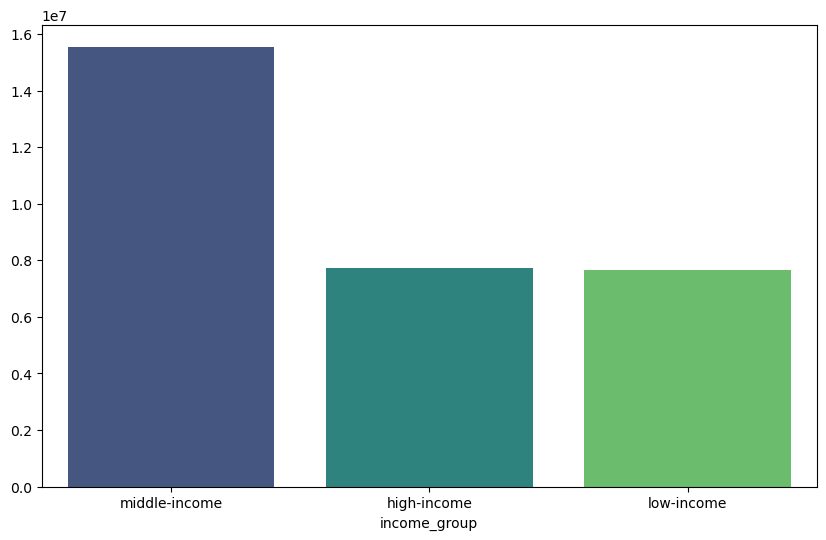

In [69]:
plt_1 = plt.figure(figsize=(10, 6))
sns.barplot(x=income_group_counts.index, y=income_group_counts.values, palette="viridis")

In [ ]:
# The majority of customers belong to the 'middle-income' category

In [ ]:
plt_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_bar.png'), dpi=300)

In [71]:
high_activity_customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [73]:
# Age Groups:
high_activity_customers.loc[high_activity_customers['age'] <= 18, 'age_group'] = 'young_adult'
high_activity_customers.loc[(high_activity_customers['age'] > 18) & (high_activity_customers['age'] <= 65), 'age_group'] = 'adult'
high_activity_customers.loc[high_activity_customers['age'] > 65, 'age_group'] = 'senior_adult'

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\4059930960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['age'] <= 18, 'age_group'] = 'young_adult'


In [75]:
high_activity_customers['age_group'].value_counts()

age_group
adult           22755273
senior_adult     7730834
young_adult       478457
Name: count, dtype: int64

In [77]:
age_group_counts = high_activity_customers['age_group'].value_counts()

([<matplotlib.patches.Wedge at 0x23ea7e282f0>,
 [Text(0.0437342155035544, -1.0991302554266664, 'adult'),
  Text(0.009651782593535147, 1.099957655136218, 'senior_adult'),
  Text(-0.8073462424848706, 0.7471225098640522, 'young_adult')],
 [Text(0.023855026638302395, -0.5995255938690907, '73.5%'),
  Text(0.0052646086873828065, 0.5999769028015735, '25.0%'),
  Text(-0.4403706777190203, 0.4075213690167557, '1.5%')])

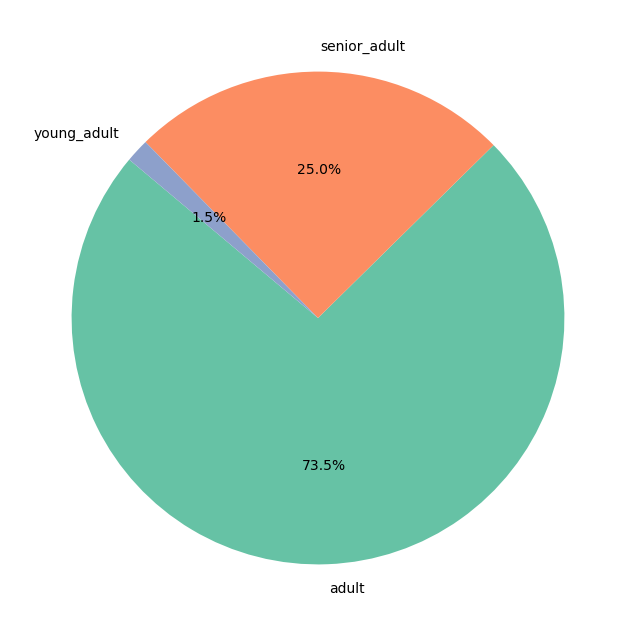

In [79]:
plt_2 = plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])

In [ ]:
plt_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie.png'), dpi=300)

In [81]:
high_activity_customers['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [83]:
# n_dependants Groups:
high_activity_customers.loc[high_activity_customers['n_dependants'] == 0, 'family_status'] = 'single'
high_activity_customers.loc[high_activity_customers['n_dependants'] > 0, 'family_status'] = 'family'

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\3761215467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['n_dependants'] == 0, 'family_status'] = 'single'


In [85]:
family_status_counts = high_activity_customers['family_status'].value_counts()

C:\Users\geram\AppData\Local\Temp\ipykernel_6560\1267490530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_status_counts.index, y=family_status_counts.values, palette="viridis")


<Axes: xlabel='family_status'>

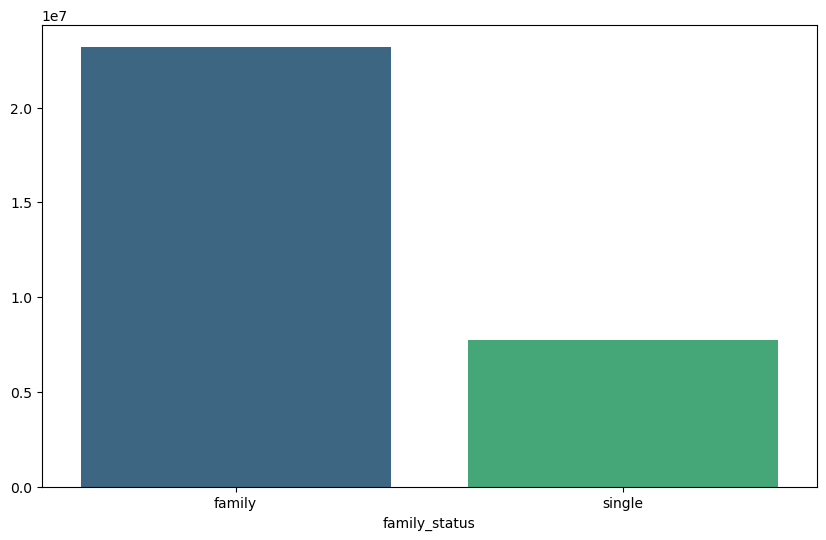

In [87]:
plt_3 = plt.figure(figsize=(10, 6))
sns.barplot(x=family_status_counts.index, y=family_status_counts.values, palette="viridis")

In [ ]:
plt_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_status_bar.png'), dpi=300)

In [ ]:
# The majority of clients belong to the family category